In [25]:
#Importing file
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
data=pd.read_csv("E:\Assigment\energydata_complete.csv")
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [26]:
data1=pd.read_csv("E:\Assigment\energydata_complete.csv")
print('The number of rows in dataset is - ' , data1.shape[0])
print('The number of columns in dataset is - ' , data1.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [27]:
del data['date']
del data1['date']
del data['rv1']
del data1['rv1']
del data['rv2']
del data1['rv2']

In [57]:
data1['Appliances']=np.where(data1['Appliances']<=60,0,1)

In [58]:
data1_y = data1['Appliances']
data1_X = data1.drop(labels = ['Appliances'],axis = 1)

In [59]:
#Using StandardScaler to scale the values of the variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc_data1 = pd.DataFrame(columns=data1_X.columns , index=data1_X.index)

sc_data1[sc_data1.columns] = sc.fit_transform(data1_X)

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
#Using StandardScaler to scale the values of the variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc_data = pd.DataFrame(columns=data.columns , index=data.index)

sc_data[sc_data.columns] = sc.fit_transform(data)


E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
from sklearn.cluster import KMeans

def Kmeans(data,clusters,iterations):
    kmeans = KMeans(n_clusters=clusters, random_state=100,n_init=iterations )
    start=time.time()
    kmeans=kmeans.fit(data)
    end=time.time()
    Diff=end-start
    return kmeans

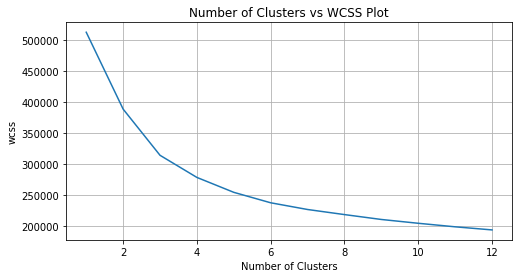

In [38]:
No_clusters=[1,2,3,4,5,6,7,8,9,10,11,12]
wcss=[]
for i in No_clusters:
    model_Kmeans=Kmeans(sc_data,i,10)
    wcss.append(model_Kmeans.inertia_)
    

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax1.plot(No_clusters, wcss)
ax1.set(xlabel='Number of Clusters', ylabel='wcss', title='Number of Clusters vs WCSS Plot')
ax1.grid()

In [43]:
from sklearn.mixture import GaussianMixture as GMM

def RP(sc_data):
    def SelBest(arr:list, X:int)->list:
        '''
        returns the set of X configurations with shorter distance
        '''
        dx=np.argsort(arr)[:X]
        return arr[dx]

    # Finding the number of clusters using Silhouette scores
    n_clusters=np.arange(2, 10)
    sils=[]
    sils_err=[]
    iterations=10
    for n in n_clusters:
        tmp_sil=[]
        for _ in range(iterations):
            gmm=GMM(n, n_init=2,random_state=100).fit(sc_data) 
            labels=gmm.predict(sc_data)
            sil=metrics.silhouette_score(sc_data, labels, metric='euclidean')
            tmp_sil.append(sil)
        val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
        err=np.std(tmp_sil)
        sils.append(val)
        sils_err.append(err)
    return n_clusters, sils, sils_err

Text(0, 0.5, 'Score')

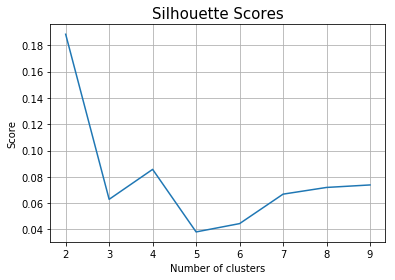

In [45]:
#Finding number of clusters using Expectation Maximization
n_clusters, sils, sils_err = RP(sc_data)

#Plotting the number of clusters using Silhouette
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=15)
plt.grid()
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")

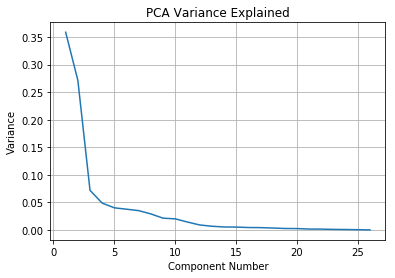

In [47]:
# Implementing PCA to find maximum variance 
from sklearn.decomposition import PCA


pca = PCA(n_components= None)
sc_data_PCA = pca.fit_transform(sc_data)
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1,27),explained_variance)
plt.title("PCA Variance Explained")
plt.xlabel("Component Number")
plt.ylabel("Variance")
plt.grid()
plt.show()

pca_final = PCA(n_components = 6 )
sc_data_PCA = pca_final.fit_transform(sc_data)


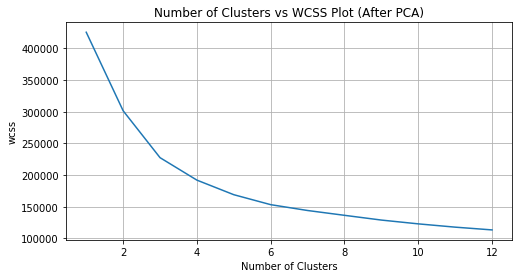

In [48]:
#Finding number of clusters using Kmeans after PCA
No_clusters=[1,2,3,4,5,6,7,8,9,10,11,12]
wcss=[]
for i in No_clusters:
    model_Kmeans=Kmeans(sc_data_PCA,i,10)
    wcss.append(model_Kmeans.inertia_)
    

fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax2.plot(No_clusters, wcss)
ax2.set(xlabel='Number of Clusters', ylabel='wcss', title='Number of Clusters vs WCSS Plot (After PCA)')
ax2.grid()

Text(0, 0.5, 'Score')

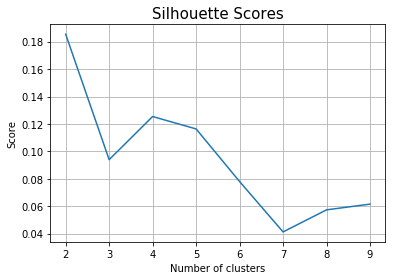

In [49]:
#Finding number of clusters using Expectation Maximization after PCA
n_clusters, sils, sils_err = RP(sc_data_PCA )

#Plotting the number of clusters using Silhouette
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=15)
plt.grid()
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")

In [50]:
#Implementing ICA
from sklearn.decomposition import FastICA

ica = FastICA(tol = 1e-2, max_iter = 1000, n_components =6)
sc_data_ICA = ica.fit_transform(sc_data)


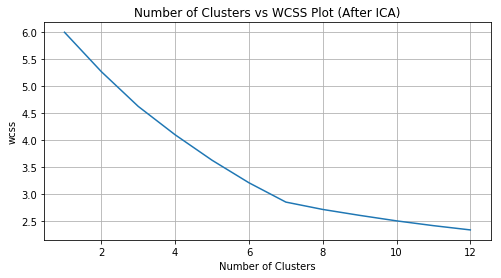

In [51]:
#Finding number of clusters using Kmeans after ICA
No_clusters=[1,2,3,4,5,6,7,8,9,10,11,12]
wcss=[]
for i in No_clusters:
    model_Kmeans=Kmeans(sc_data_ICA,i,10)
    wcss.append(model_Kmeans.inertia_)
    

fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax3.plot(No_clusters, wcss)
ax3.set(xlabel='Number of Clusters', ylabel='wcss', title='Number of Clusters vs WCSS Plot (After ICA)')
ax3.grid()

Text(0, 0.5, 'Score')

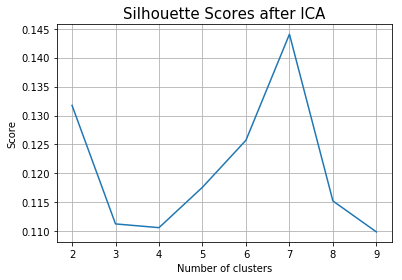

In [52]:
#Finding number of clusters using Expectation Maximization after ICA
n_clusters, sils, sils_err = RP(sc_data_ICA )

#Plotting the number of clusters using Silhouette
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores after ICA", fontsize=15)
plt.grid()
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")

In [53]:
#Implementing Randomized Projection
from sklearn.random_projection import SparseRandomProjection
srp = SparseRandomProjection(eps = 0.1, n_components = 6)
sc_data_rp = srp.fit_transform(sc_data)

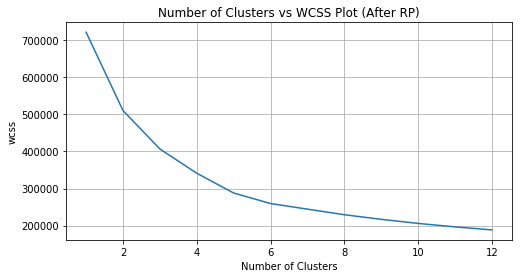

In [54]:
#Finding number of clusters using Kmeans after Randomized Projection
No_clusters=[1,2,3,4,5,6,7,8,9,10,11,12]
wcss=[]
for i in No_clusters:
    model_Kmeans=Kmeans(sc_data_rp,i,10)
    wcss.append(model_Kmeans.inertia_)
    

fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax4.plot(No_clusters, wcss)
ax4.set(xlabel='Number of Clusters', ylabel='wcss', title='Number of Clusters vs WCSS Plot (After RP)')
ax4.grid()

Text(0, 0.5, 'Score')

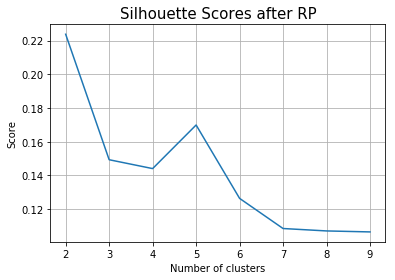

In [55]:
#Finding number of clusters using Expectation Maximization after RP
n_clusters, sils, sils_err = RP(sc_data_rp )

#Plotting the number of clusters using Silhouette
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores after RP", fontsize=15)
plt.grid()
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")

In [93]:
# Using RFE to do the feature selection by Random Forest
from sklearn.feature_selection import RFECV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=6,random_state=100)
rfecv = RFECV(estimator=dt, step=1, cv=5, n_jobs=-1,
              scoring='accuracy')
rfecv.fit(sc_data1, data1_y)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.ranking_)

sc_data1_FS = sc_data1.iloc[:,[0,2,3,5,10,11,12,15,16,17,18,21]]

Optimal number of features : 12
[ 1  6  1  1  5  1  4  7  2  8  1  1  1 13  3  1  1  1  1 12  9  1 14 11
 10]


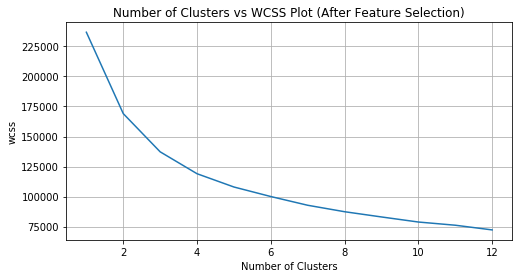

In [94]:
#Finding number of clusters using Kmeans after Randomized Projection
No_clusters=[1,2,3,4,5,6,7,8,9,10,11,12]
wcss=[]
for i in No_clusters:
    model_Kmeans=Kmeans(sc_data1_FS,i,10)
    wcss.append(model_Kmeans.inertia_)
    

fig5, ax5 = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

ax5.plot(No_clusters, wcss)
ax5.set(xlabel='Number of Clusters', ylabel='wcss', title='Number of Clusters vs WCSS Plot (After Feature Selection)')
ax5.grid()

Text(0, 0.5, 'Score')

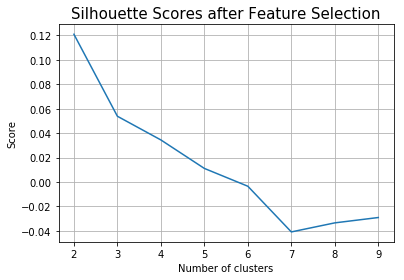

In [95]:
#Finding number of clusters using Expectation Maximization after RP
n_clusters, sils, sils_err = RP(sc_data1_FS)

#Plotting the number of clusters using Silhouette
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores after Feature Selection", fontsize=15)
plt.grid()
plt.xticks(n_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Score")

In [99]:
#Implementing ANN with normal dataset : 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train_C ,X_test_C, y_train_C , y_test_C = train_test_split(sc_data1, data1_y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (100,50,50,50),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_C, y_train_C.ravel())

y_pred_C = ANN_class_Energy.predict(X_test_C)
y_expect_C = y_test_C

Result_C = accuracy_score(y_expect_C , y_pred_C)
print(Result_C)

cm_C = confusion_matrix(y_test_C , y_pred_C)
print(cm_C)


0.8719092014592622
[[2409  252]
 [ 380 1893]]


In [98]:
#Implementing ANN after PCA : 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train_C ,X_test_C, y_train_C , y_test_C = train_test_split(sc_data_PCA, data1_y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (100,50,50,50),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_C, y_train_C.ravel())

y_pred_C = ANN_class_Energy.predict(X_test_C)
y_expect_C = y_test_C

Result_C = accuracy_score(y_expect_C , y_pred_C)
print(Result_C)

cm_C = confusion_matrix(y_test_C , y_pred_C)
print(cm_C)

# Implementing ANN after ICA : 
X_train_C ,X_test_C, y_train_C , y_test_C = train_test_split(sc_data_ICA, data1_y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (100,50,50,50),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_C, y_train_C.ravel())


y_pred_C = ANN_class_Energy.predict(X_test_C)
y_expect_C = y_test_C


Result_C = accuracy_score(y_expect_C , y_pred_C)
print(Result_C)


cm_C = confusion_matrix(y_test_C , y_pred_C)
print(cm_C)

### Implementing ANN after randomized projection : 
X_train_C ,X_test_C, y_train_C , y_test_C = train_test_split(sc_data_rp, data1_y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (100,50,50,50),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_C, y_train_C.ravel())

y_pred_C = ANN_class_Energy.predict(X_test_C)
y_expect_C = y_test_C

Result_C = accuracy_score(y_expect_C , y_pred_C)
print(Result_C)

cm_C = confusion_matrix(y_test_C , y_pred_C)
print(cm_C)

### Implementing ANN after Feature Selection : 
X_train_C ,X_test_C, y_train_C , y_test_C = train_test_split(sc_data1_FS, data1_y, test_size = 0.25 , random_state = 0)

ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (100,50,50,50),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter= 600,
                          random_state= 0 )

ANN_class_Energy.fit(X_train_C, y_train_C.ravel())


y_pred_C = ANN_class_Energy.predict(X_test_C)
y_expect_C = y_test_C

Result_C = accuracy_score(y_expect_C , y_pred_C)
print(Result_C)

cm_C = confusion_matrix(y_test_C , y_pred_C)
print(cm_C)



0.8751520064856101
[[2356  305]
 [ 311 1962]]
0.8046209971625456
[[2186  475]
 [ 489 1784]]
0.834414268342116
[[2357  304]
 [ 513 1760]]
0.8686663964329144
[[2408  253]
 [ 395 1878]]


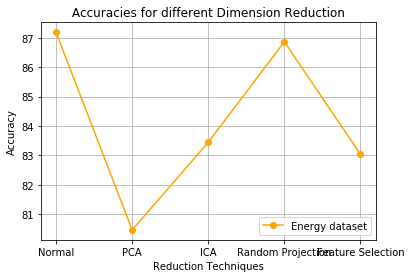

In [100]:
#Comparing the accuracies of models obtained above

accuracies = [87.190 , 80.462 , 83.441 , 86.866 , 83.04 ]
accuracies_type = ['Normal','PCA','ICA','Random Projection','Feature Selection']
plt.plot(accuracies_type , accuracies , marker='o',markersize=6,color='orange',label='Energy dataset')
plt.title(" Accuracies for different Dimension Reduction ")
plt.xlabel("Reduction Techniques")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()